## Decision Tree Classifier 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### step 1: Read the Dataset 

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### step 2: perform Basic Data Quality Checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()

1

### Step 3: Separate X and Y (species)

In [7]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [8]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [10]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

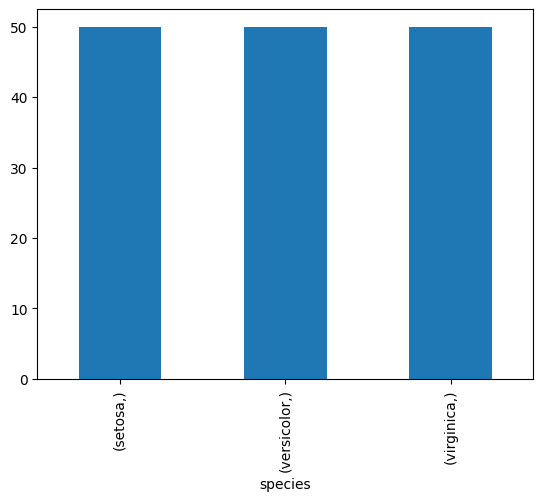

In [11]:
Y.value_counts().plot(kind='bar')

### Step 4: Apply Preprocessing on X

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('sacler',StandardScaler())]).set_output(transform='pandas')

In [14]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('sacler', StandardScaler())])

In [15]:
X_pre = num_pipe.fit_transform(X)
X_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


### Step 5: Apply Train test split

In [16]:
from sklearn.model_selection import train_test_split
xtrian ,xtest,ytrian ,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=21)

In [17]:
xtrian.shape

(120, 4)

In [18]:
ytrian.shape

(120, 1)

In [19]:
xtest.shape

(30, 4)

In [20]:
ytest.shape

(30, 1)

### step : 6 Model Building 

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=1,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             criterion='gini')
dtc.fit(xtrian,ytrian)

DecisionTreeClassifier(max_depth=1, min_samples_split=10)

In [22]:
dtc.score(xtrian,ytrian)

0.6833333333333333

In [23]:
dtc.score(xtest,ytest)

0.6

#### After appling Decision tree model with some assumpes parameters the model score is below 0.8 so it is not peform well so we need to tunne the parameter 

### step 7 : Hyperparameter tunning 

In [24]:
params ={'max_depth':[1,2,3,4,5],
         'min_samples_split':[1,2,3,4,5,6,7],
         'min_samples_leaf':[1,2,3,4,5,6,7],
         'criterion':['gini','entropy']}

In [25]:
from sklearn.model_selection import GridSearchCV
dtc2 = DecisionTreeClassifier()
gscv = GridSearchCV(dtc2,param_grid=params,cv=5,scoring='f1_macro')
gscv.fit(xtrian,ytrian)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7]},
             scoring='f1_macro')

In [26]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [27]:
gscv.best_score_

0.9913630229419702

In [28]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=4)

###  step 8 Evaluate  The Model

In [30]:
best_dtc.score(xtrian,ytrian)

1.0

In [31]:
best_dtc.score(xtest,ytest)

0.9333333333333333

In [33]:
ypred_train = best_dtc.predict(xtrian)
ypred_train[0:5]
ypred_test = best_dtc.predict(xtest)
ypred_test[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [34]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [35]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [36]:
ypred_train[0:5]

array(['setosa', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [37]:
ytrian.head()

,species
41,setosa
131,virginica
70,versicolor
46,setosa
126,virginica


## Plot confusion matrix for test data

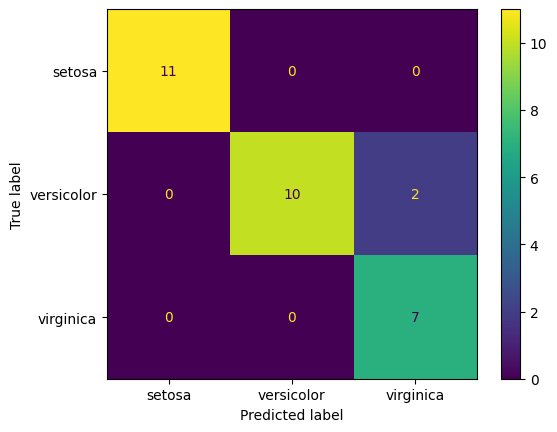

In [38]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_test)
cfd = ConfusionMatrixDisplay(cf,display_labels=best_dtc.classes_)
cfd.plot()

### check classification Report for test 

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.83      0.91        12
   virginica       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



### Cross validated scores

In [40]:
from sklearn.model_selection import cross_val_score
f1_scores =cross_val_score(best_dtc,xtrian,ytrian,cv=5,scoring='f1_macro')
f1_scores

array([0.95681511, 1.        , 1.        , 1.        , 1.        ])

In [41]:
f1_scores.mean()

0.9913630229419702

In [43]:
Acc_scores = cross_val_score(best_dtc,xtrian,ytrian,cv=5,scoring='accuracy')
Acc_scores

array([0.95833333, 0.95833333, 1.        , 1.        , 1.        ])

In [44]:
Acc_scores.mean()

0.9833333333333334

### Plotting decision Tree 

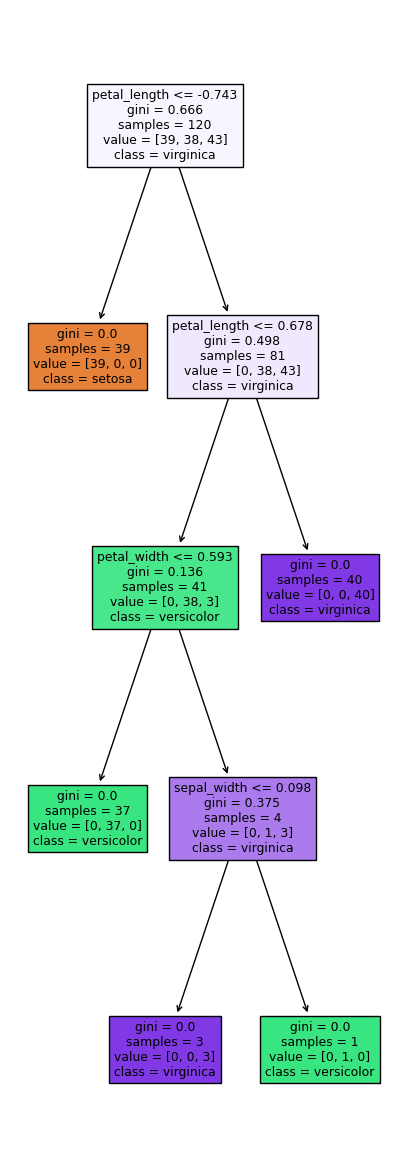

In [59]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(5,15))
plot_tree(best_dtc,
          feature_names=xtrian.columns,
          class_names=best_dtc.classes_,
          filled=True)
plt.show()

### step 9: Out of sample Predictions

In [49]:
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [50]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [51]:
preds = best_dtc.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [52]:
probs = best_dtc.predict_proba(xnew_pre)
probs[0:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [55]:
import numpy as np
max_probs = np.max(probs,axis=1)
max_probs

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#### save above to xnew /

In [56]:
xnew['species_pred']=preds
xnew['prob']=max_probs

In [57]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,prob
0,5.5,2.5,4.0,1.3,versicolor,1.0
1,6.9,3.1,5.1,2.3,virginica,1.0
2,5.1,2.5,3.0,1.1,versicolor,1.0
3,4.4,2.9,NaN,0.2,versicolor,1.0
4,5.9,3.0,5.1,1.8,virginica,1.0
5,5.5,3.5,1.3,0.2,setosa,1.0
6,5.6,NaN,3.6,1.3,versicolor,1.0
7,6.5,3.0,5.2,2.0,virginica,1.0
8,5.3,3.7,1.5,0.2,setosa,1.0
9,5.1,3.4,1.5,NaN,setosa,1.0


In [58]:
xnew.to_csv('DTcREsults.csv',index=False)